# <u>DA5401 Assignment 2</u>

### Jerlin Chellam J DA25C009

## Part A: Exploratory Data Analysis (EDA) & Preprocessing

### Load and Prepare the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.shape

(8124, 23)

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
dup_data=df.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


### one-hot encoding
- One-hot encoding is necessary because PCA requires numerical input. Since the mushroom dataset is entirely categorical, we must transform each category into binary (0/1) features. This allows PCA to compute distances and variances correctly in the new feature space.

In [8]:
y = df['class']  
X = df.drop('class', axis=1)

X_encoded = pd.get_dummies(X)

### Initial Analysis
- After one-hot encoding, the number of features increases significantly because each category expands into separate binary columns. This transformation ensures PCA can process the categorical dataset numerically.

In [9]:
print("Original shape:", X.shape)
print("After one-hot encoding:", X_encoded.shape)

Original shape: (8124, 22)
After one-hot encoding: (8124, 117)


In [10]:
X_encoded.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [10]:
X_encoded = pd.get_dummies(X).astype(int)
X_encoded.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Standardization
- Even though one-hot encoded features are binary (0/1), standardization makes them mean-centered and unit variance. This ensures PCA does not give extra importance to features with more categories or higher variance.
  
- PCA looks for directions of maximum variance, so features with higher variance can dominate the principal components.

- Standardizing ensures all features have mean 0 and variance 1, giving them equal weight in PCA.

- This avoids bias toward frequent categories and produces a more balanced dimensionality reduction.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)

print("Shape after standardization:", X_scaled.shape)

Shape after standardization: (8124, 117)


## Part B: Principal Component Analysis

### Applying PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [13]:
print("Original shape:", X_scaled.shape)
print("After PCA transformation:", X_pca.shape)

Original shape: (8124, 117)
After PCA transformation: (8124, 117)


### Scree Plot & Optimal Components
- The scree plot shows how much variance each principal component explains individually.

- The cumulative curve helps identify the number of components needed to retain most of the variance.

- Typically, we aim for around 95% cumulative variance to balance information retention and dimensionality reduction.

- Based on the plot, we can select the optimal number of components where the cumulative variance first crosses the 95% line.

In [13]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

* **Justification**
    * The scree plot below shows the explained variance ratio of each component and the cumulative variance.

    * The cumulative curve crosses the 95% line at 59 components.

    * This means we can reduce the dataset from hundreds of one-hot encoded features to just 59 principal components while still keeping most of the information.

    * Choosing fewer than 59 would lose too much variance, while keeping all features would not reduce dimensionality.

    * So, 59 is the optimal number of components, as it balances dimensionality reduction and information retention.

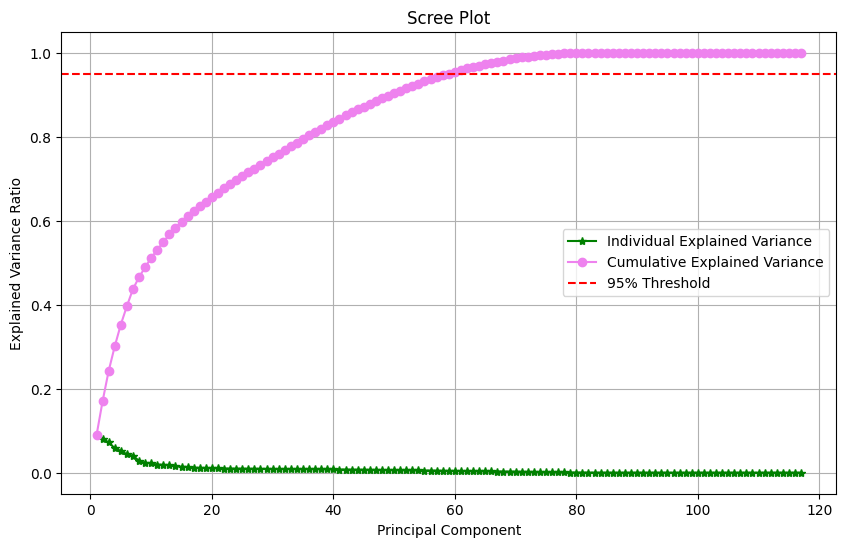

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='*', color='green',label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='violet',label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components (95% variance):", optimal_components)

Optimal number of components (95% variance): 59


### Visualization
- In the 2D scatter plot of PC1 vs PC2, we see that edible (green) and poisonous (red) mushrooms show partial separation.

- While there is overlap, some clustering patterns emerge, meaning PCA captured useful variance for classification.

- The pair plot across the first four components shows that additional dimensions can reveal stronger separation.

- This suggests that while 2 PCs give some insight, keeping more components may help classification models better distinguish the two classes.

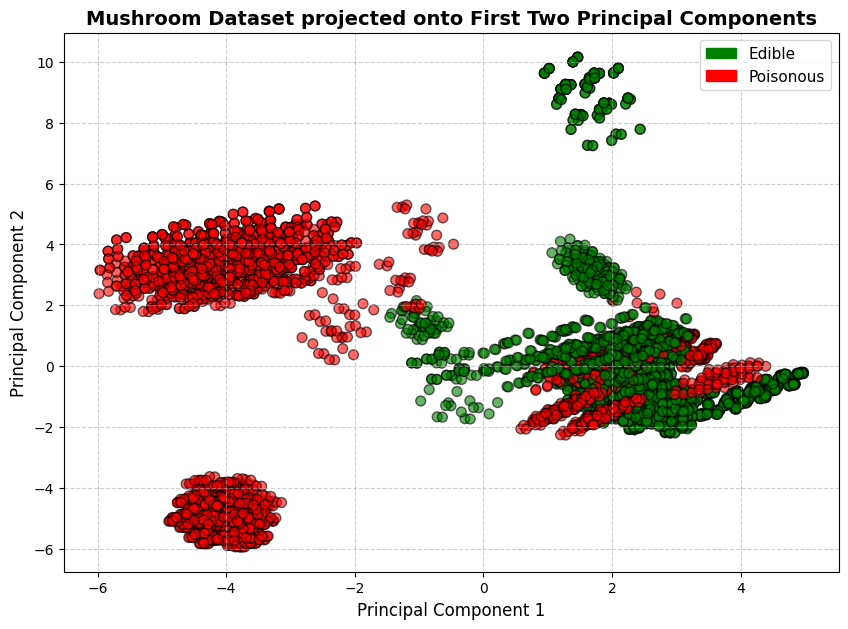

In [23]:
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

color_map = {'e': 'green', 'p': 'red'}
colors = [color_map[label] for label in y]

plt.figure(figsize=(10,7))
plt.scatter(pc1, pc2, c=colors, alpha=0.6, edgecolor='k', s=50)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Mushroom Dataset projected onto First Two Principal Components', fontsize=14, fontweight='bold')

import matplotlib.patches as mpatches
plt.legend(handles=[
    mpatches.Patch(color='green', label='Edible'),
    mpatches.Patch(color='red', label='Poisonous')
], fontsize=11)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

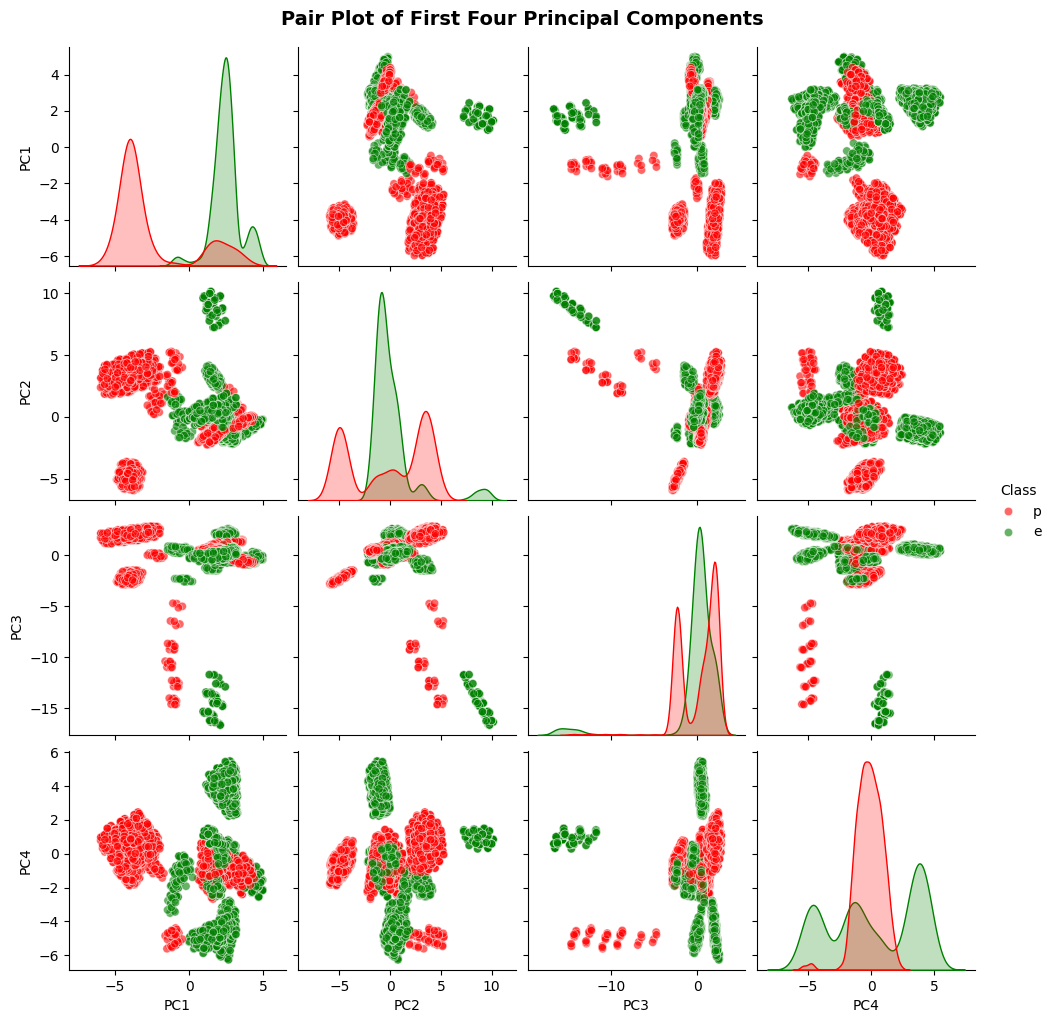

In [24]:
pca_df = pd.DataFrame(X_pca[:, :4], columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Class'] = y.values

sns.pairplot(pca_df, hue='Class', diag_kind='kde', palette={'e': 'green', 'p': 'red'}, plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot of First Four Principal Components", y=1.02, fontsize=14, fontweight='bold')
plt.show()

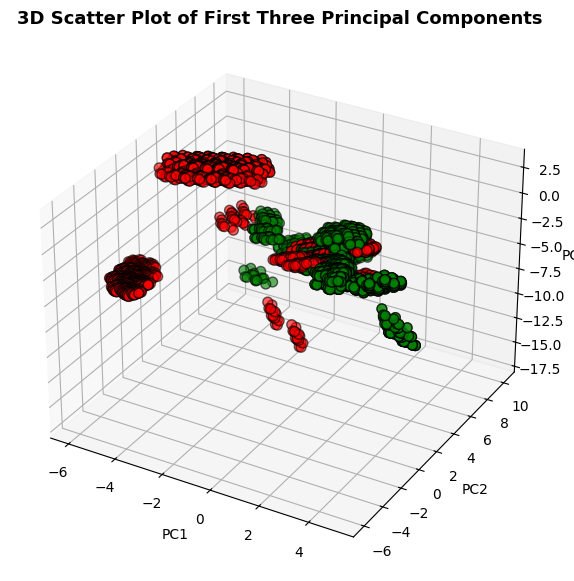

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], 
           c=[color_map[label] for label in y], 
           alpha=0.6, s=50, edgecolor='k')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("3D Scatter Plot of First Three Principal Components", fontsize=13, fontweight='bold')

plt.show()

* From above Visualizations we can see that,
    * The 2D scatter plot shows that edible and poisonous mushrooms overlap but still form distinguishable clusters in the reduced space.

    * The pairplot with more PCs shows clearer separation across different dimensions, suggesting PCA has captured useful patterns.

    * The 3D scatter plot provides a better view, where the classes appear more separable compared to just 2D.

    * Overall, PCA reduces dimensionality while still maintaining the separability of classes, proving useful for classification.

## Part C: Performance Evaluation with Logistic Regression

### Baseline Model
- We split the standardized data into training (80%) and testing (20%) sets.

- sampling ensures both edible and poisonous classes are evenly represented in each split.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6499, 117)
Testing set shape: (1625, 117)


We train a Logistic Regression classifier on the standardized training data.

The model learns the relationship between mushroom features and their edibility (edible vs poisonous).

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, random_state=42)

log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


- We evaluated the Logistic Regression model on the test set using accuracy and detailed metrics (precision, recall, F1-score).
  
- These results serve as the baseline performance before applying PCA for dimensionality reduction.

In [32]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



* From the above we can see that,

    * The Logistic Regression model achieved 100% accuracy on the test set.

    * Both edible (e) and poisonous (p) mushrooms were classified perfectly, with precision, recall, and F1-score all equal to 1.0.

    * This means the dataset is highly separable, and Logistic Regression could capture the patterns without any errors.

### PCA-Transformed Model

In [33]:
pca_opt = PCA(n_components=59)

X_train_pca = pca_opt.fit_transform(X_train)
X_test_pca = pca_opt.transform(X_test)

print("Original training shape:", X_train.shape)
print("After PCA transformation:", X_train_pca.shape)

print("Original testing shape:", X_test.shape)
print("After PCA transformation:", X_test_pca.shape)

Original training shape: (6499, 117)
After PCA transformation: (6499, 59)
Original testing shape: (1625, 117)
After PCA transformation: (1625, 59)


In [34]:
log_reg_pca = LogisticRegression(max_iter=500, random_state=42)

log_reg_pca.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


- Below I evaluated the Logistic Regression model trained on PCA-transformed features using accuracy and a classification report.
  
- This gives us performance metrics to compare directly against the baseline model trained on the original data.

In [35]:
y_pred_pca = log_reg_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Test Accuracy (PCA-transformed):", accuracy_pca)

print("\nClassification Report (PCA-transformed data):")
print(classification_report(y_test, y_pred_pca))

Test Accuracy (PCA-transformed): 0.9987692307692307

Classification Report (PCA-transformed data):
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



* From the above we can know that,
    * The PCA-transformed Logistic Regression model achieved 99.9% accuracy, which is almost the same as the baseline model’s perfect 100%.

    * Precision, recall, and F1-scores are all 1.0, showing that both edible and poisonous mushrooms are still classified almost perfectly.
        
    * This proves PCA successfully reduced the dataset to fewer dimensions (59 PCs) without losing important information.

    * The very tiny drop in accuracy (0.1%) is due to a little information loss, but the benefit is a simpler and smaller feature space.

### Comparison and Analysis

In [36]:
print("Baseline Logistic Regression (Original Data)")
y_pred_baseline = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))

print("\nLogistic Regression (PCA-Transformed Data, 59 components)")
y_pred_pca = log_reg_pca.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

Baseline Logistic Regression (Original Data)
Accuracy: 1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Logistic Regression (PCA-Transformed Data, 59 components)
Accuracy: 0.9987692307692307
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#### More comparisons

In [37]:
baseline_acc = accuracy_score(y_test, y_pred_baseline)
pca_acc = accuracy_score(y_test, y_pred_pca)

comparison = pd.DataFrame({
    "Model": ["Baseline (Original Data)", "PCA (59 Components)"],
    "Accuracy": [baseline_acc, pca_acc],
    "Precision (e)": [
        classification_report(y_test, y_pred_baseline, output_dict=True)['e']['precision'],
        classification_report(y_test, y_pred_pca, output_dict=True)['e']['precision']
    ],
    "Recall (e)": [
        classification_report(y_test, y_pred_baseline, output_dict=True)['e']['recall'],
        classification_report(y_test, y_pred_pca, output_dict=True)['e']['recall']
    ],
    "F1-score (e)": [
        classification_report(y_test, y_pred_baseline, output_dict=True)['e']['f1-score'],
        classification_report(y_test, y_pred_pca, output_dict=True)['e']['f1-score']
    ],
})

display(comparison)

,Model,Accuracy,Precision (e),Recall (e),F1-score (e)
0,Baseline (Original Data),1.000000,1.00000,1.0,1.000000
1,PCA (59 Components),0.998769,0.99763,1.0,0.998814


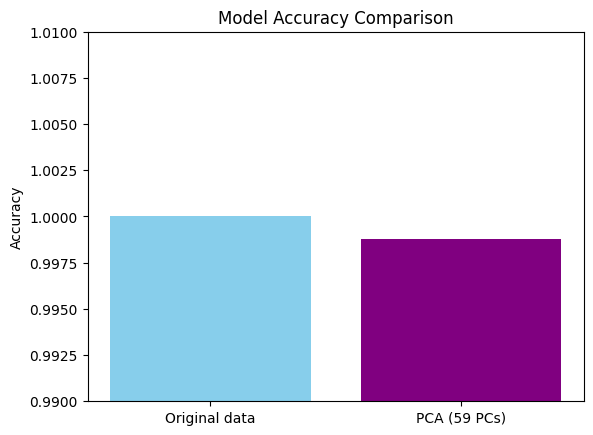

In [42]:
plt.bar(["Original data", "PCA (59 PCs)"], [baseline_acc, pca_acc], color=['skyblue', 'purple'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.99, 1.01)
plt.show()

#### *significant difference in performance?*
-> There is no big difference in performance between the two models. The baseline model gave perfect accuracy, while the PCA model was almost perfect (99.87%). The small drop happens because PCA removes some tiny details while reducing the number of features.

-> This trade-off is expected as PCA compresses the data to 59 components, removing redundancy and collinearity, but it may lose a little information. Still, the accuracy stayed nearly the same, which means PCA worked well at keeping the important patterns while making the data simpler.

#### *performance benefit?*
-> PCA reduces collinearity by combining correlated features into independent principal components.

-> This makes the feature space cleaner and avoids giving extra weight to redundant variables.

-> Even though the accuracy change is very small, the benefit is in efficiency and simpler representation of the data.

#### Logistic Regression as a surrogate performance measurement
-> Logistic Regression is a good choice to check how effective PCA is because it is a simple and transparent model. If PCA keeps the important information in fewer dimensions, even a basic model like Logistic Regression can classify well.

-> Since Logistic Regression does not add complex transformations, it clearly shows whether PCA preserved the patterns in the data. This makes it a fair and useful “surrogate test” for evaluating PCA’s effectiveness.

## Summary
    1. I worked with the Mushroom dataset where the goal was to classify mushrooms as edible or poisonous.

    2. Since the dataset had only categorical features, I applied one-hot encoding to convert them into numerical format.

    3. Then I standardized the features so that PCA could treat all of them equally.

    4. Using PCA, I created new features (principal components) and found that 59 components were enough to retain 95% of the variance.

    5. I visualized the data in 2D, 3D, and pairplots, which showed good separation between edible and poisonous mushrooms.

    6. Logistic Regression was trained on both the original data and the PCA-transformed data.

    7. The comparisons between both original data and the PCA-transformed data were visualized.

## Conclusion

    o The baseline Logistic Regression model achieved 100% accuracy, while the PCA model achieved almost the same with 99.9% accuracy.

    o This shows that PCA successfully reduced feature redundancy and collinearity while keeping most of the important information.

    o Even though there was a very small drop in accuracy, PCA provided a big benefit by simplifying the dataset from hundreds of features to just 59 components.

    o Logistic Regression proved to be a good test model, as it clearly showed that PCA preserved the class separability in a lower-dimensional vector space.

    o Overall, PCA is a powerful technique for dimensionality reduction that keeps models efficient without sacrificing much performance.